## 0. Packages and Datasets Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, boxcox, yeojohnson
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore 


In [2]:
df = pd.read_csv('../Data/digital_marketing_campaign_dataset.csv')

In [3]:
df_original = pd.read_csv('../Data/digital_marketing_campaign_dataset.csv')

## 1. EDA 

In [4]:
df.head(5)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


from data source, data card
Demographic Information

CustomerID: Unique identifier for each customer.
Age: Age of the customer.
Gender: Gender of the customer (Male/Female).
Income: Annual income of the customer in USD.
Marketing-specific Variables

CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
AdSpend: Amount spent on the marketing campaign in USD.
ClickThroughRate: Rate at which customers click on the marketing content.
ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
AdvertisingPlatform: Confidential.
AdvertisingTool: Confidential.
Customer Engagement Variables

WebsiteVisits: Number of visits to the website.
PagesPerVisit: Average number of pages visited per session.
TimeOnSite: Average time spent on the website per visit (in minutes).
SocialShares: Number of times the marketing content was shared on social media.
EmailOpens: Number of times marketing emails were opened.
EmailClicks: Number of times links in marketing emails were clicked.
Historical Data

PreviousPurchases: Number of previous purchases made by the customer.
LoyaltyPoints: Number of loyalty points accumulated by the customer.
Target Variable

Conversion: Binary variable indicating whether the customer converted (1) or not (0).

In [5]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [6]:
num_rows, num_cols = df.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 8000 rows and 20 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [8]:
def print_column_info(df):
    col_info = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Unique Values': [df[col].nunique() for col in df.columns]
    })
    print(col_info)

print_column_info(df)

            Column Name Data Type  Unique Values
0            CustomerID     int64           8000
1                   Age     int64             52
2                Gender    object              2
3                Income     int64           7789
4       CampaignChannel    object              5
5          CampaignType    object              4
6               AdSpend   float64           8000
7      ClickThroughRate   float64           8000
8        ConversionRate   float64           8000
9         WebsiteVisits     int64             50
10        PagesPerVisit   float64           8000
11           TimeOnSite   float64           8000
12         SocialShares     int64            100
13           EmailOpens     int64             20
14          EmailClicks     int64             10
15    PreviousPurchases     int64             10
16        LoyaltyPoints     int64           3983
17  AdvertisingPlatform    object              1
18      AdvertisingTool    object              1
19           Convers

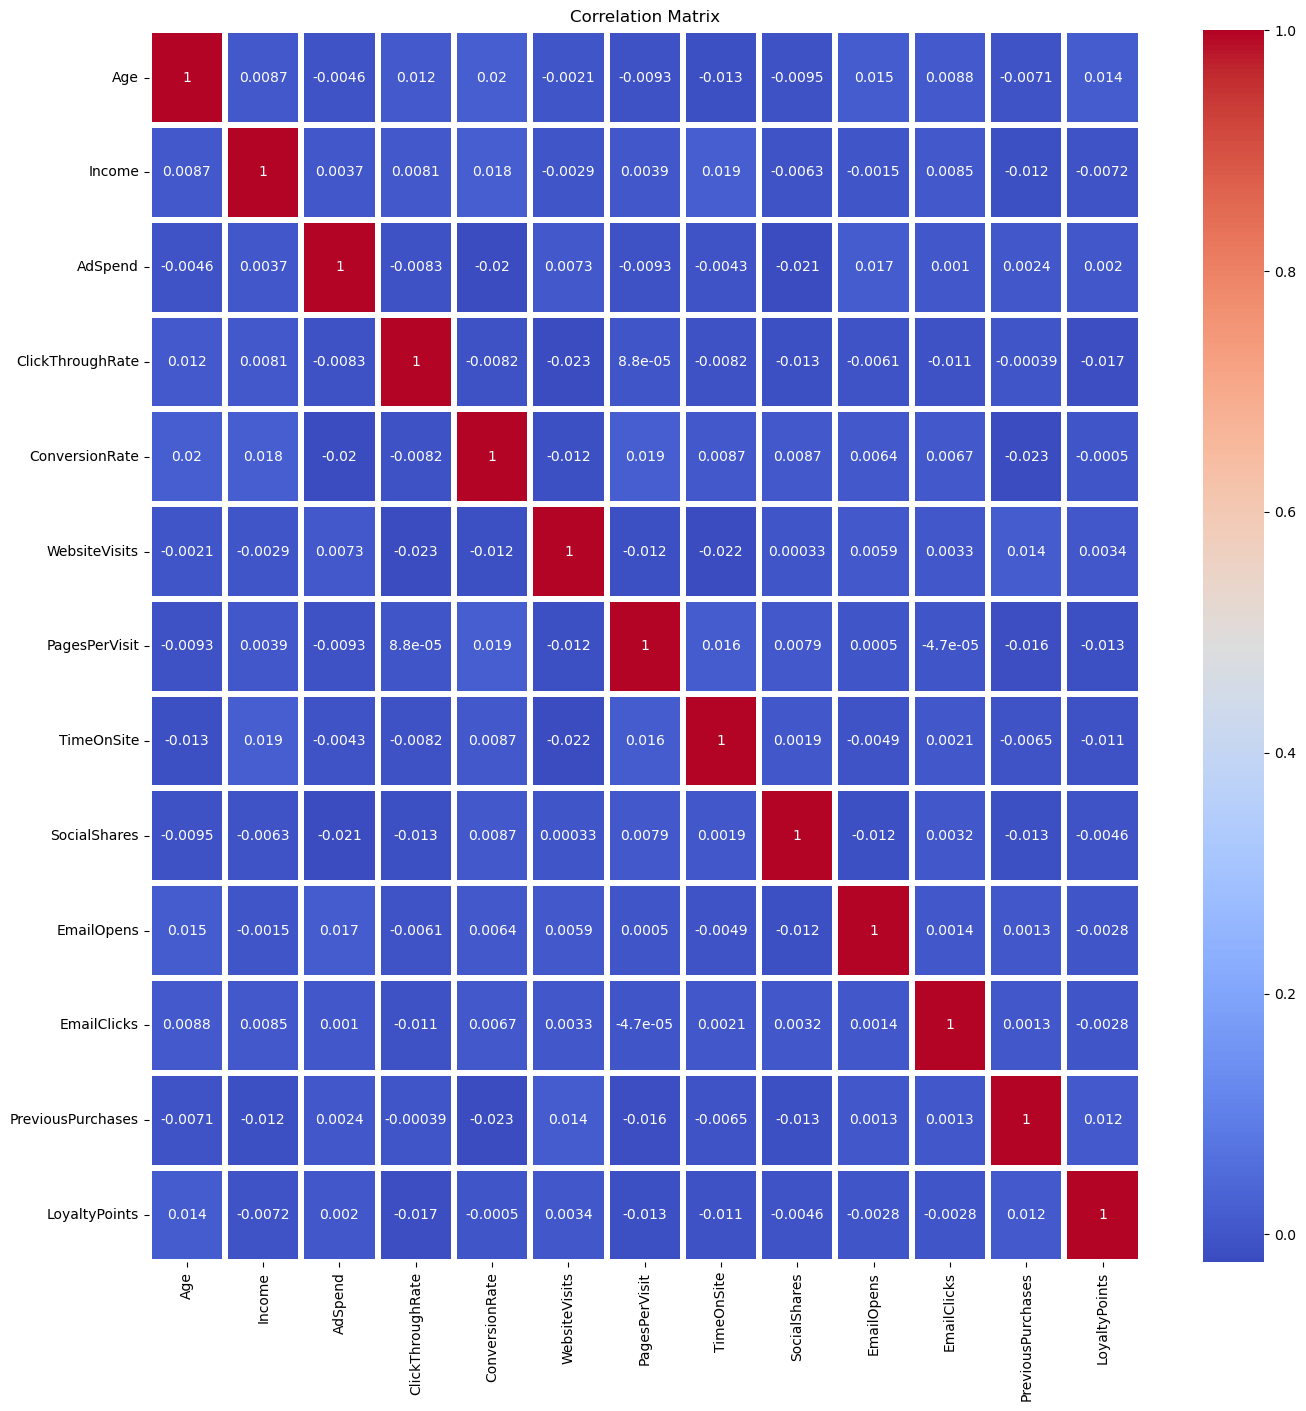

In [9]:
# Define the list of numerical columns
numerical_cols = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 
                  'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 
                  'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

# Create a new DataFrame containing only the numerical columns
df_numerical = df[numerical_cols]


corr_matrix = df_numerical.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths= 3)
plt.title('Correlation Matrix')
plt.show()

## 2. Data Cleaning


### 2.1 Removing Columns that does not contribute to segmentation

columns 'AdvertisingPlatform', 'AdvertisingTool' only have one unique value for all rows and Customer ID also does not contribute to segmentation, so I dropped these columns here

In [10]:
df_drop = df.drop(columns = ['AdvertisingPlatform', 'AdvertisingTool','CustomerID'])

In [11]:
print_column_info(df_drop)

          Column Name Data Type  Unique Values
0                 Age     int64             52
1              Gender    object              2
2              Income     int64           7789
3     CampaignChannel    object              5
4        CampaignType    object              4
5             AdSpend   float64           8000
6    ClickThroughRate   float64           8000
7      ConversionRate   float64           8000
8       WebsiteVisits     int64             50
9       PagesPerVisit   float64           8000
10         TimeOnSite   float64           8000
11       SocialShares     int64            100
12         EmailOpens     int64             20
13        EmailClicks     int64             10
14  PreviousPurchases     int64             10
15      LoyaltyPoints     int64           3983
16         Conversion     int64              2


In [12]:
df = df_drop

### 2.2 Check for missing values

In [13]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = missing_percentage[missing_percentage > 0]
print(missing_data)



Series([], dtype: float64)


In [14]:
missing_percentage

Age                  0.0
Gender               0.0
Income               0.0
CampaignChannel      0.0
CampaignType         0.0
AdSpend              0.0
ClickThroughRate     0.0
ConversionRate       0.0
WebsiteVisits        0.0
PagesPerVisit        0.0
TimeOnSite           0.0
SocialShares         0.0
EmailOpens           0.0
EmailClicks          0.0
PreviousPurchases    0.0
LoyaltyPoints        0.0
Conversion           0.0
dtype: float64

### 2.3 Check for duplicate records

In [15]:
df.duplicated().sum()  # Count duplicate rows
df[df.duplicated()]  # Display duplicate rows


,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion


### 2.4 Check for outliers


Checking outliers for: Age
No Z-score outliers in Age.
No IQR outliers in Age.


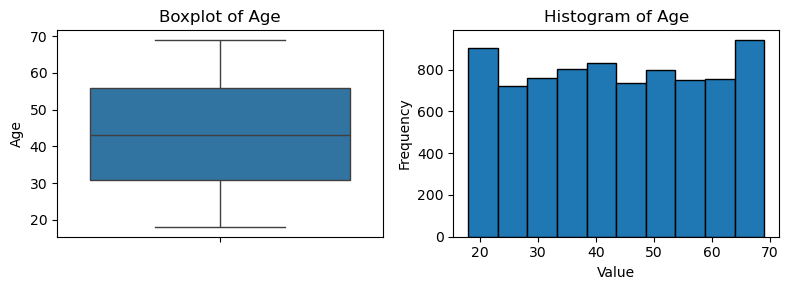


Checking outliers for: Income
No Z-score outliers in Income.
No IQR outliers in Income.


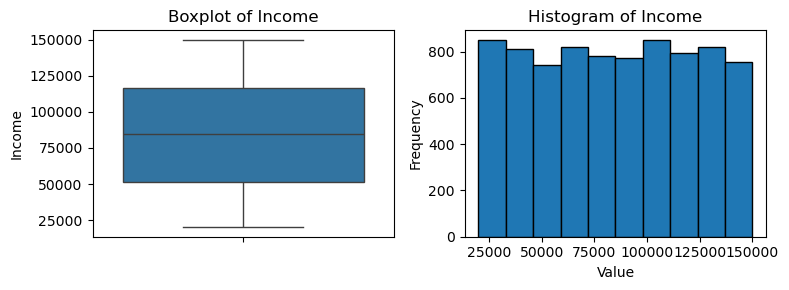


Checking outliers for: AdSpend
No Z-score outliers in AdSpend.
No IQR outliers in AdSpend.


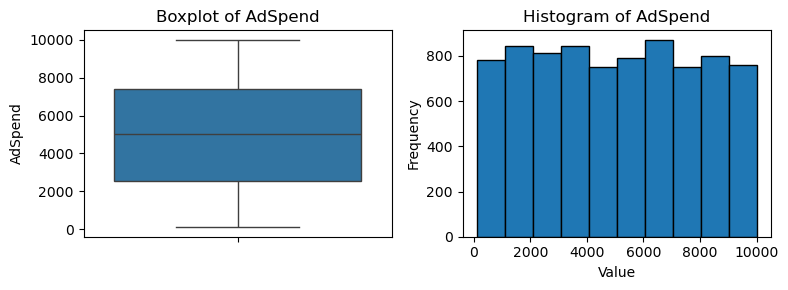


Checking outliers for: ClickThroughRate
No Z-score outliers in ClickThroughRate.
No IQR outliers in ClickThroughRate.


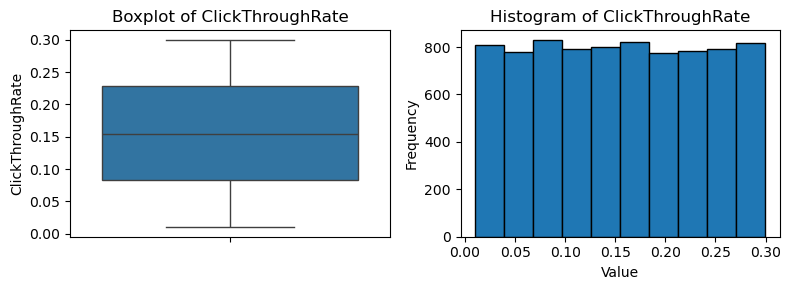


Checking outliers for: ConversionRate
No Z-score outliers in ConversionRate.
No IQR outliers in ConversionRate.


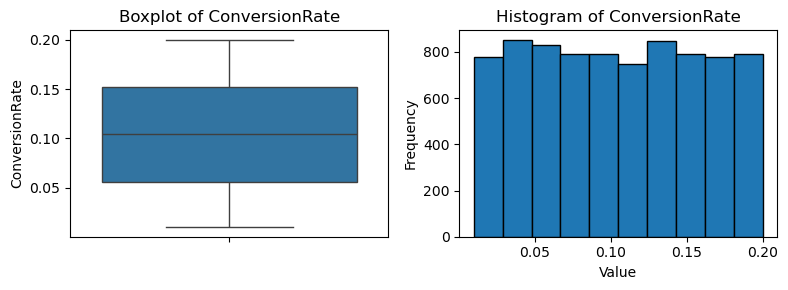


Checking outliers for: WebsiteVisits
No Z-score outliers in WebsiteVisits.
No IQR outliers in WebsiteVisits.


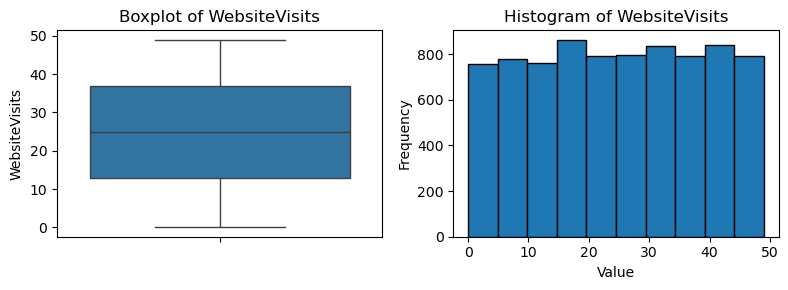


Checking outliers for: PagesPerVisit
No Z-score outliers in PagesPerVisit.
No IQR outliers in PagesPerVisit.


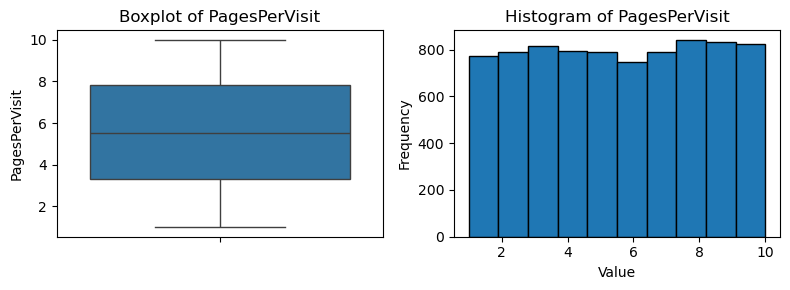


Checking outliers for: TimeOnSite
No Z-score outliers in TimeOnSite.
No IQR outliers in TimeOnSite.


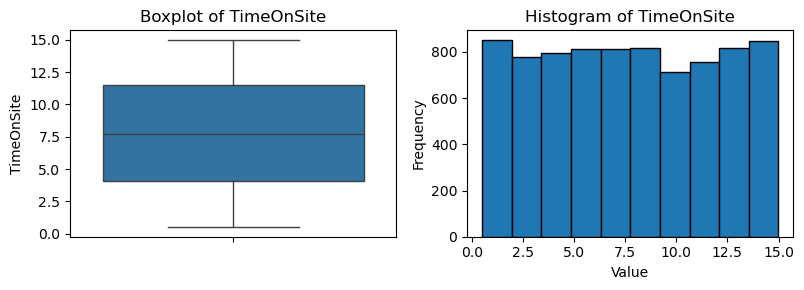


Checking outliers for: SocialShares
No Z-score outliers in SocialShares.
No IQR outliers in SocialShares.


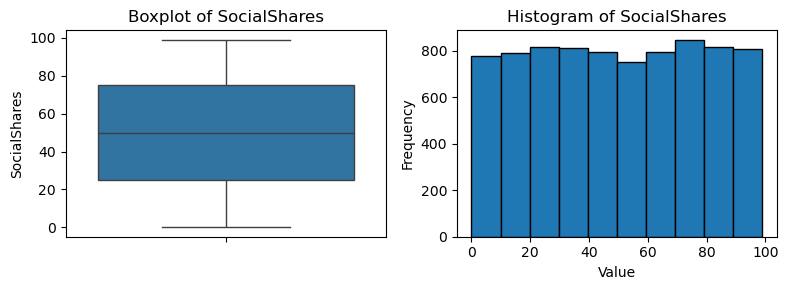


Checking outliers for: EmailOpens
No Z-score outliers in EmailOpens.
No IQR outliers in EmailOpens.


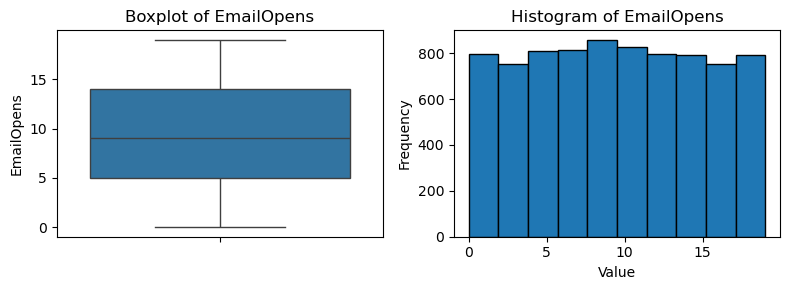


Checking outliers for: EmailClicks
No Z-score outliers in EmailClicks.
No IQR outliers in EmailClicks.


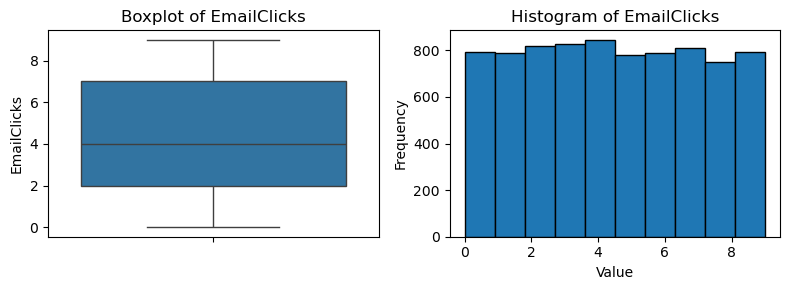


Checking outliers for: PreviousPurchases
No Z-score outliers in PreviousPurchases.
No IQR outliers in PreviousPurchases.


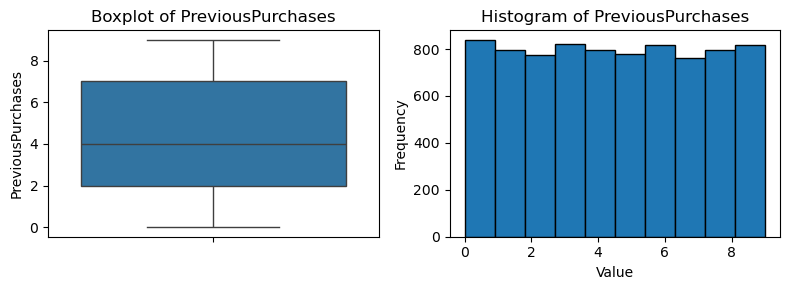


Checking outliers for: LoyaltyPoints
No Z-score outliers in LoyaltyPoints.
No IQR outliers in LoyaltyPoints.


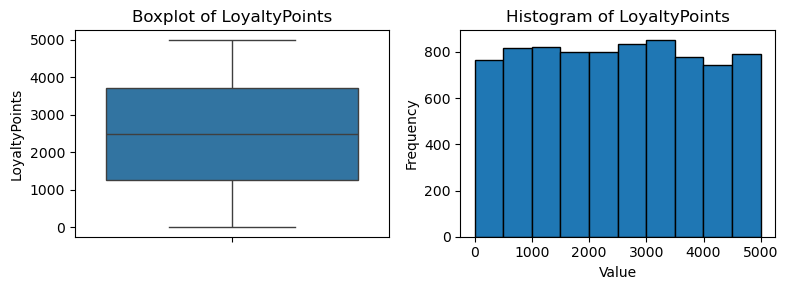


Checking outliers for: Conversion
No Z-score outliers in Conversion.
Outliers using IQR in Conversion:
       Age  Gender  Income CampaignChannel   CampaignType      AdSpend  \
15     41  Female   39192           Email      Awareness   429.079217   
26     29    Male   78618           Email  Consideration   636.588008   
43     24    Male   43386             SEO      Retention  5705.127963   
113    25  Female   67659        Referral     Conversion  2135.887712   
142    31  Female   78186             PPC      Retention  1508.760068   
...   ...     ...     ...             ...            ...          ...   
7993   20    Male  120271    Social Media      Retention  6973.120174   
7994   69  Female  124883        Referral      Awareness  7875.372633   
7995   21    Male   24849           Email      Awareness  8518.308575   
7996   43  Female   44718             SEO      Retention  1424.613446   
7999   31  Female   93002           Email      Awareness  7743.627070   

      ClickThrough

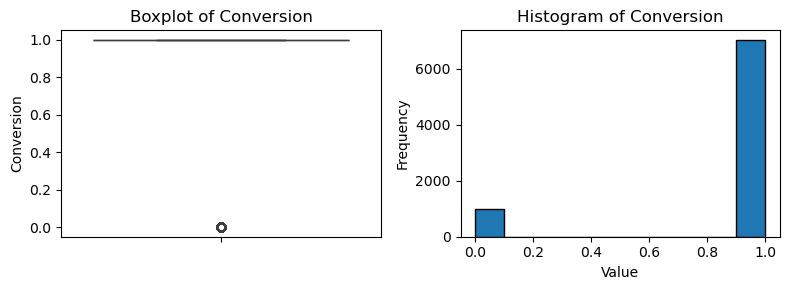

In [16]:
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"\nChecking outliers for: {column}")
    
    # Z-Score Method
    z_scores = zscore(df[column])
    outliers_z = df[abs(z_scores) > 3]
    if not outliers_z.empty:
        print(f"Outliers using Z-score in {column}:\n", outliers_z)
    else:
        print(f"No Z-score outliers in {column}.")
    
    # IQR Method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers_iqr.empty:
        print(f"Outliers using IQR in {column}:\n", outliers_iqr)
    else:
        print(f"No IQR outliers in {column}.")
    
    # Set up subplots for boxplot and histogram in one row
    plt.figure(figsize=(8, 3))  # Set smaller figure size for both plots

    # Boxplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")

    # Histogram
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    # Show both plots
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


## 3. Feature Engineering

### 3.1 Encode Non-numerical Columns

In [17]:
df.head(20)

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1
5,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,1
6,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,1
7,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,1
8,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,1
9,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,1


In [18]:
print(df.dtypes)

Age                    int64
Gender                object
Income                 int64
CampaignChannel       object
CampaignType          object
AdSpend              float64
ClickThroughRate     float64
ConversionRate       float64
WebsiteVisits          int64
PagesPerVisit        float64
TimeOnSite           float64
SocialShares           int64
EmailOpens             int64
EmailClicks            int64
PreviousPurchases      int64
LoyaltyPoints          int64
Conversion             int64
dtype: object


In [19]:

for column in df.select_dtypes(include=['object']).columns:
    # Get the number of unique values and the unique values themselves
    num_unique = df[column].nunique()
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique}")
    print(f"Unique values: {unique_values}")
    print('-' * 40)  # Separator line for clarity


Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']
----------------------------------------
Column: CampaignChannel
Number of unique values: 5
Unique values: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
----------------------------------------
Column: CampaignType
Number of unique values: 4
Unique values: ['Awareness' 'Retention' 'Conversion' 'Consideration']
----------------------------------------


Since the number of unique values for each of these object columns are not so large, I tried encode by using one-hot encoding

In [20]:
columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)
df = df_encoded

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8000 non-null   int64  
 1   Income                        8000 non-null   int64  
 2   AdSpend                       8000 non-null   float64
 3   ClickThroughRate              8000 non-null   float64
 4   ConversionRate                8000 non-null   float64
 5   WebsiteVisits                 8000 non-null   int64  
 6   PagesPerVisit                 8000 non-null   float64
 7   TimeOnSite                    8000 non-null   float64
 8   SocialShares                  8000 non-null   int64  
 9   EmailOpens                    8000 non-null   int64  
 10  EmailClicks                   8000 non-null   int64  
 11  PreviousPurchases             8000 non-null   int64  
 12  LoyaltyPoints                 8000 non-null   int64  
 13  Con

In [22]:
df_encoded.columns

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion', 'Gender_Female', 'Gender_Male', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')

### 3.2 Standardization of Data

In [23]:
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)

### 3.3 Reduce Dimension by PCA

In [24]:
pca_range = range(2, min(df_scaled.shape[1], 10) + 1)  # from 2 to either 10 or number of features

# Define k-range for K-Means
k_range = range(2, 11)

# Initialize variables to store the best configuration
overall_best_sil = -np.inf
best_pca_n = None
best_k_for_best = None
best_scores_for_best = None

In [25]:
# Loop over different numbers of PCA components
for n_components in pca_range:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components, random_state=42)
    X_pca_temp = pca.fit_transform(df_scaled)
    
    # Test K-Means for this PCA-transformed data
    scores_temp = []
    for k in k_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=42)
        labels_temp = kmeans_temp.fit_predict(X_pca_temp)
        sil = silhouette_score(X_pca_temp, labels_temp)
        scores_temp.append((k, sil))
    
    # Find the best silhouette score for this number of PCA components
    best_for_this = max(scores_temp, key=lambda x: x[1])
    
    # Check if this configuration is better than the overall best
    if best_for_this[1] > overall_best_sil:
        overall_best_sil = best_for_this[1]
        best_pca_n = n_components
        best_k_for_best = best_for_this[0]
        best_scores_for_best = scores_temp

In [26]:
# Print the best configuration found
print("Best number of PCA components:", best_pca_n)
print("Best k (clusters) for that PCA configuration:", best_k_for_best)
print("Overall best silhouette score:", overall_best_sil)

Best number of PCA components: 2
Best k (clusters) for that PCA configuration: 6
Overall best silhouette score: 0.6917106071593926


In [28]:

pca_best = PCA(n_components=best_pca_n, random_state=42)
df_pca_best = pca_best.fit_transform(df_scaled)

In [30]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

print("Explained variance by 2 PCA components:", pca.explained_variance_ratio_)

Explained variance by 2 PCA components: [0.08034666 0.05788138]


In [31]:
# Test K-Means silhouette scores on the best PCA configuration
scores_best = []
for k in k_range:
    kmeans_best = KMeans(n_clusters=k, random_state=42)
    labels_best = kmeans_best.fit_predict(df_pca_best)
    sil_best = silhouette_score(df_pca_best, labels_best)
    scores_best.append((k, sil_best))

In [32]:

# Extract values for plotting
ks_best = [item[0] for item in scores_best]
sil_values_best = [item[1] for item in scores_best]

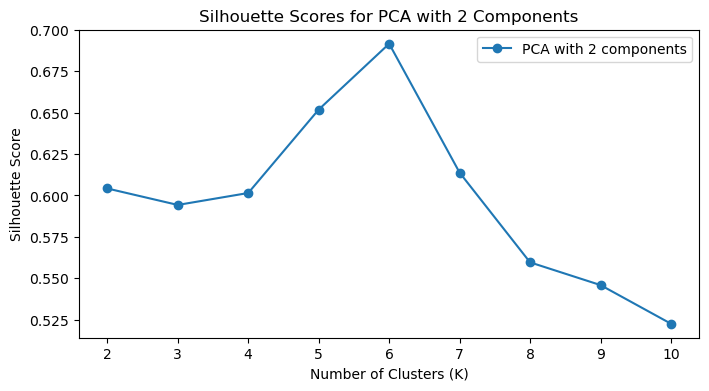

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(ks_best, sil_values_best, marker='o', label=f'PCA with {best_pca_n} components')
plt.title(f"Silhouette Scores for PCA with {best_pca_n} Components")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [34]:
def test_kmeans_silhouette(X_data, k_range=range(2,21), random_state=42):
    results = []
    for k in k_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=random_state)
        labels_temp = kmeans_temp.fit_predict(X_data)
        sil = silhouette_score(X_data, labels_temp)
        results.append((k, sil))
    return results

k_range = range(2,21)
scores_no_pca = test_kmeans_silhouette(df, k_range)
scores_pca = test_kmeans_silhouette(df_pca, k_range)

print("No PCA silhouette scores:", scores_no_pca)
print("PCA silhouette scores:", scores_pca)

No PCA silhouette scores: [(2, 0.6179309935332032), (3, 0.5643877818883579), (4, 0.5422417479713845), (5, 0.5135419640946677), (6, 0.48781402696781834), (7, 0.47039646888175035), (8, 0.44410509015612515), (9, 0.42430056613650013), (10, 0.4088430222359673), (11, 0.3983802846437055), (12, 0.38154884684692875), (13, 0.36737358226903316), (14, 0.3536921748990003), (15, 0.3387955416617956), (16, 0.325960920227907), (17, 0.310410084561909), (18, 0.30916252380193365), (19, 0.3072917219782988), (20, 0.3010234702028189)]
PCA silhouette scores: [(2, 0.6042129098838593), (3, 0.5942643842283246), (4, 0.6014853281032236), (5, 0.6519103250873443), (6, 0.6917106071593926), (7, 0.6138029549596513), (8, 0.5595613086612893), (9, 0.5458282507872042), (10, 0.5224691040259456), (11, 0.5042557360772788), (12, 0.4870724766734902), (13, 0.47287906443305144), (14, 0.46944030828837696), (15, 0.45572547195420804), (16, 0.4496271457706711), (17, 0.44158375838933), (18, 0.4372225639418939), (19, 0.4328560412157152

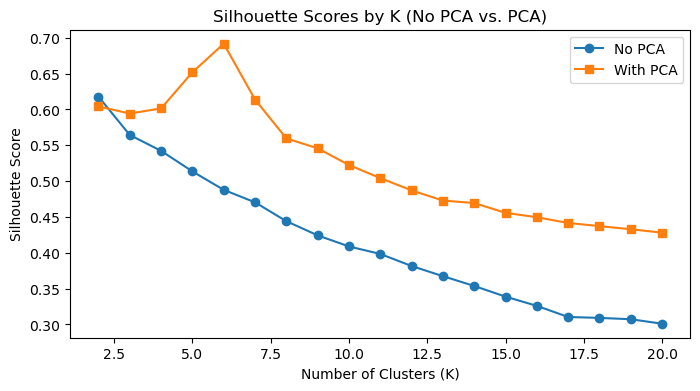

In [35]:

plt.figure(figsize=(8, 4))

# Plot no-PCA
ks_no_pca = [item[0] for item in scores_no_pca]
sil_no_pca = [item[1] for item in scores_no_pca]
plt.plot(ks_no_pca, sil_no_pca, marker='o', label='No PCA')

# Plot with PCA
ks_pca = [item[0] for item in scores_pca]
sil_pca = [item[1] for item in scores_pca]
plt.plot(ks_pca, sil_pca, marker='s', label='With PCA')

plt.title("Silhouette Scores by K (No PCA vs. PCA)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [36]:
range_n_clusters = range(2, 20)
silhouette_scores = {}
inertia_values = {}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    sil_score = silhouette_score(df_pca, labels)
    inertia = kmeans.inertia_
    
    silhouette_scores[n_clusters] = sil_score
    inertia_values[n_clusters] = inertia
    
    print(f"Clusters: {n_clusters}, Silhouette Score: {sil_score:.4f}, Inertia: {inertia:.4f}")

Clusters: 2, Silhouette Score: 0.6042, Inertia: 11657.0408
Clusters: 3, Silhouette Score: 0.5942, Inertia: 7247.3669
Clusters: 4, Silhouette Score: 0.6018, Inertia: 4592.8428
Clusters: 5, Silhouette Score: 0.6518, Inertia: 2657.7026
Clusters: 6, Silhouette Score: 0.6917, Inertia: 1437.0185
Clusters: 7, Silhouette Score: 0.6138, Inertia: 1078.5732
Clusters: 8, Silhouette Score: 0.5596, Inertia: 846.2990
Clusters: 9, Silhouette Score: 0.5353, Inertia: 703.9258
Clusters: 10, Silhouette Score: 0.5168, Inertia: 610.4361
Clusters: 11, Silhouette Score: 0.4979, Inertia: 533.4614
Clusters: 12, Silhouette Score: 0.4853, Inertia: 470.2702
Clusters: 13, Silhouette Score: 0.4737, Inertia: 420.8107
Clusters: 14, Silhouette Score: 0.4598, Inertia: 381.9146
Clusters: 15, Silhouette Score: 0.4521, Inertia: 349.3818
Clusters: 16, Silhouette Score: 0.4451, Inertia: 322.3715
Clusters: 17, Silhouette Score: 0.4367, Inertia: 289.4393
Clusters: 18, Silhouette Score: 0.4340, Inertia: 268.0195
Clusters: 19, S

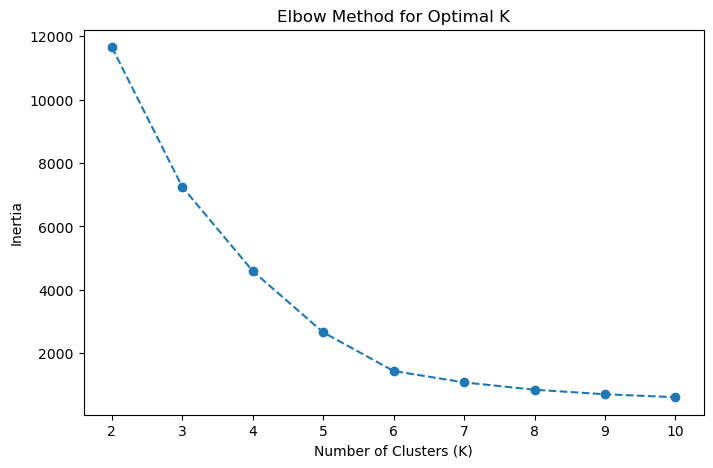

In [37]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [38]:


# Set the number of clusters to 4
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit KMeans and predict cluster labels
labels = kmeans.fit_predict(df_pca)  

# Add the cluster labels to the original dataframe
df['Cluster_Label'] = labels  

# Display the first few rows of the updated dataframe
print(df.head())


   Age  Income      AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0   56  136912  6497.870068          0.043919        0.088031              0   
1   69   41760  3898.668606          0.155725        0.182725             42   
2   46   88456  1546.429596          0.277490        0.076423              2   
3   32   44085   539.525936          0.137611        0.088004             47   
4   60   83964  1678.043573          0.252851        0.109940              0   

   PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  ...  \
0       2.399017    7.396803            19           6  ...   
1       2.917138    5.352549             5           2  ...   
2       8.223619   13.794901             0          11  ...   
3       4.540939   14.688363            89           2  ...   
4       2.046847   13.993370             6           6  ...   

   CampaignChannel_Email  CampaignChannel_PPC  CampaignChannel_Referral  \
0                  False                False                    

In [42]:
df.head(10)

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,Cluster_Label,Customer_ID
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,False,False,False,True,True,False,False,False,1,8000
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,False,False,False,False,False,False,False,True,2,8001
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,True,False,False,False,True,False,False,False,1,8002
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,True,False,False,False,False,False,True,False,3,8003
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,True,False,False,False,False,False,True,False,3,8004
5,25,42925,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,...,False,False,False,True,True,False,False,False,1,8005
6,38,25615,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,...,False,True,False,False,True,False,False,False,1,8006
7,56,57083,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,...,False,False,False,True,False,False,True,False,3,8007
8,36,140788,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,...,False,False,False,False,False,False,False,True,1,8008
9,40,130764,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,...,False,False,False,True,True,False,False,False,2,8009


In [43]:
df["Customer_ID"] = df_original["CustomerID"]
df_original['Cluster_Label'] = df['Cluster_Label']


In [50]:
# Export df to a CSV file
df_original.to_csv("segments_withid.csv", index=False)

